# DATA ANALYSIS
# SAKSHI JAIN
# ROLL NO 20110181

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pwd

'C:\\Users\\saksh\\Downloads'

In [5]:
#importing the dataset 'netflix tv series and shows'
df=pd.read_csv("netflix.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director1     4265 non-null   object
 4   director2     434 non-null    object
 5   cast          5664 non-null   object
 6   country       5758 non-null   object
 7   date_added    6223 non-null   object
 8   release_year  6234 non-null   int64 
 9   rating        6224 non-null   object
 10  duration      6234 non-null   object
 11  listed_in     6234 non-null   object
 12  description   6234 non-null   object
dtypes: int64(2), object(11)
memory usage: 633.3+ KB


In [4]:
df.head()

,show_id,type,title,director1,director2,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,Richard Finn,Tim Maltby,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,NaN,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
#checking number of blank entries in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director1       1969
director2       5800
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# filling the missing values in the country column with the mode of the country column
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [8]:
# filling the missing values in the date_added column with the ffill() function as the blank entries are in the end
df['date_added'] = df['date_added'].ffill()

In [9]:
#dropping the columns which are not required for analysis
df.drop(['description','cast'], axis=1, inplace=True)

In [10]:
#checking number of blank entries in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director1       1969
director2       5800
country            0
date_added         0
release_year       0
rating            10
duration           0
listed_in          0
dtype: int64

In [10]:
#checking the data type of date_added column
type(df['date_added'][1])

str

In [11]:
# As can be seen, date_added column is a string, so we need to convert it into date format for further processing
df['date_added'] = pd.to_datetime(df['date_added'])

In [12]:
#checking the data type of date_added column
type(df['date_added'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
#checking for duplicate entries
df[df.duplicated()]

,show_id,type,title,director1,director2,country,date_added,release_year,rating,duration,listed_in


In [14]:
# there are no duplicate entries

In [15]:
#extracting month and year from column date_added
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

In [16]:
df.head()

,show_id,type,title,director1,director2,country,date_added,release_year,rating,duration,listed_in,month_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,Richard Finn,Tim Maltby,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",9,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,NaN,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,9,2016
2,70234439,TV Show,Transformers Prime,NaN,NaN,United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,9,2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,NaN,United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,9,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,NaN,United States,2017-09-08,2017,TV-14,99 min,Comedies,9,2017


In [17]:
#checking unique values in column rating
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [18]:
#there are 15 unique values in column 'rating', let's convert this column according to the age group
#and analyse with that new column

In [19]:
#making a dictionary for age group
rating_age = { 'TV-PG': 7,'TV-MA': 18,'TV-Y7-FV': 7,'TV-Y7': 7,
            'TV-14': 16,'R': 18,'TV-Y': 0,'NR': 18,'PG-13': 13,
            'TV-G': 0,'PG': 7,'G': 0,'UR': 18,'NC-17': 18}

In [20]:
#making a new column for converting the rating to age using dictionary rating_age
df['rating_age'] = df['rating'].map(rating_age)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director1     4265 non-null   object        
 4   director2     434 non-null    object        
 5   country       6234 non-null   object        
 6   date_added    6234 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  month_added   6234 non-null   int64         
 12  year_added    6234 non-null   int64         
 13  rating_age    6224 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 682.0+ KB


In [21]:
df.head()

,show_id,type,title,director1,director2,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,rating_age
0,81145628,Movie,Norm of the North: King Sized Adventure,Richard Finn,Tim Maltby,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",9,2019,7.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,NaN,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,9,2016,18.0
2,70234439,TV Show,Transformers Prime,NaN,NaN,United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,9,2018,7.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,NaN,United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,9,2018,7.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,NaN,United States,2017-09-08,2017,TV-14,99 min,Comedies,9,2017,16.0


In [22]:
#checking unique values in rating_age column
df['rating_age'].unique()

array([ 7., 18., 16.,  0., 13., nan])

In [23]:
#making a new column to see if the content is 18+ or not
df['18+']=df['rating_age'].apply(lambda x: 'YES' if x>=18.0 else 'NO')

In [24]:
df.head()

,show_id,type,title,director1,director2,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,rating_age,18+
0,81145628,Movie,Norm of the North: King Sized Adventure,Richard Finn,Tim Maltby,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",9,2019,7.0,NO
1,80117401,Movie,Jandino: Whatever it Takes,NaN,NaN,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,9,2016,18.0,YES
2,70234439,TV Show,Transformers Prime,NaN,NaN,United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,9,2018,7.0,NO
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,NaN,United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,9,2018,7.0,NO
4,80125979,Movie,#realityhigh,Fernando Lebrija,NaN,United States,2017-09-08,2017,TV-14,99 min,Comedies,9,2017,16.0,NO


In [25]:
# now the data is all ready for analysis

# Q1) Which is the director who has directed highest number of movies?

In [26]:
frame=[df['director1'],df['director2']]

In [27]:
result=pd.concat(frame)

In [28]:
result.value_counts()

Raúl Campos         18
 Jan Suter          18
Marcus Raboy        14
Jay Karas           14
Jay Chapman         12
                    ..
Andrea Molaioli      1
Charlotte Zwerin     1
Oliver Schmitz       1
 Tenzing Sonam       1
Woody Allen          1
Length: 3597, dtype: int64

### From the result above, It can be said that there are 2 directors who have directed most no of movies who are Raul Campos and Jan Suter

# Q2) In which year, maximum no of movies and tv shows were released?

In [29]:
df['release_year'].value_counts()

2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1959       1
1963       1
1964       1
1956       1
1925       1
Name: release_year, Length: 72, dtype: int64

### From the result above, clearly, 2018 is the year in which maximum number of Movies and TV shows were released.

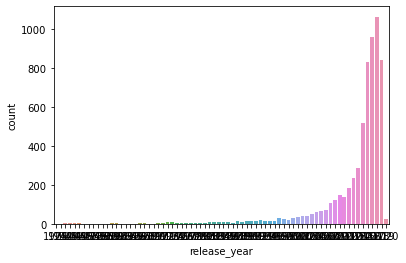

In [30]:
#plot for number of movies released Vs. year
ax = sns.countplot(x="release_year", data=df)

# Q3)What are the top 5 most popular genres?

In [31]:
df['listed_in'].value_counts().head()

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Name: listed_in, dtype: int64

# Q4) In which year, highest no of a) Movies and b) TV shows were added in Netflix

In [41]:
df[df['type']=='Movie']['year_added'].value_counts()

2019    1546
2018    1290
2017     913
2016     264
2020     147
2015      58
2014      20
2011      13
2013       6
2012       4
2009       2
2010       1
2008       1
Name: year_added, dtype: int64

### 2019 is the year in which highest number of Movies were added to Netflix

In [42]:
df[df['type']=='TV Show']['year_added'].value_counts()

2019    803
2018    492
2017    387
2016    192
2020     37
2015     32
2014     16
2013      6
2012      3
2008      1
Name: year_added, dtype: int64

### 2019 is the year in which highest number of TV Shows were added to Netflix

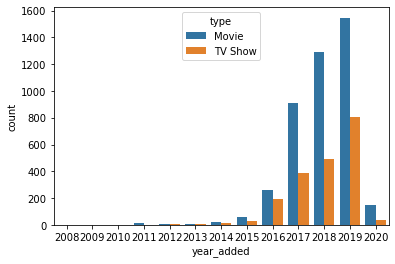

In [43]:
#plot for number of movies/tv shows released Vs. year_added
ax = sns.countplot(x="year_added", data=df,hue="type")

### Above plot shows the count plot for year_added for movies and tv shows separately

# Q5) Using plotting, show the count of Movies and TV shows per age group based on the rating.

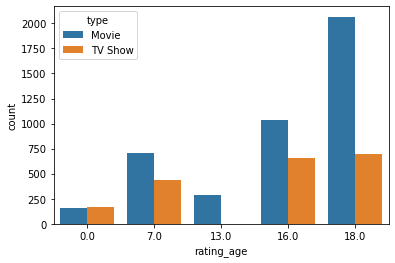

In [46]:
#plot for number of movies/tv shows per age group
ax = sns.countplot(x="rating_age", data=df,hue="type")

### Clearly, Above 18+ content has the highest number of movies and tv shows

# Q6) What is the count of movies and tv shows month wise added to Netflix?

In [48]:
agg = df.groupby(by=["month_added"]).size()

In [50]:
agg.sort_values()

month_added
2     378
6     393
5     428
4     458
7     474
9     479
8     509
3     551
1     610
11    612
10    646
12    696
dtype: int64

### December is the month when maximum number of movies and tv shows were added to netflix

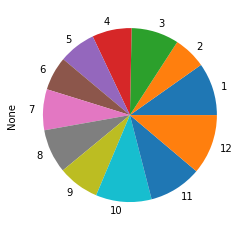

In [62]:
#pie chart to show distribution of movies and tv shows month wise
df.groupby(by=["month_added"]).size().plot.pie()

# Q7) What is the count of movies per year added based on whether it is 18+ content or not? Visualize it with a line chart.

In [65]:
agg1 =df.groupby(by=["year_added","18+"]).size()
agg1

year_added  18+
2008        YES       2
2009        NO        1
            YES       1
2010        YES       1
2011        NO        4
            YES       9
2012        NO        6
            YES       1
2013        NO        5
            YES       7
2014        NO       20
            YES      16
2015        NO       49
            YES      41
2016        NO      268
            YES     188
2017        NO      731
            YES     569
2018        NO      961
            YES     821
2019        NO     1324
            YES    1025
2020        NO      103
            YES      81
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director1     4265 non-null   object        
 4   director2     434 non-null    object        
 5   country       6234 non-null   object        
 6   date_added    6234 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  month_added   6234 non-null   int64         
 12  year_added    6234 non-null   int64         
 13  rating_age    6224 non-null   float64       
 14  18+           6234 non-null   object        
dtypes: datetime64[ns](1), float64(1), int6

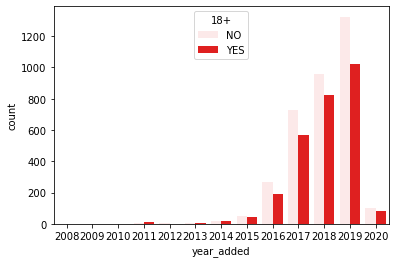

In [110]:
#plot for number of movies/tv shows per year added based on content
import seaborn as sns
ax=sns.countplot(data=df, x="year_added", hue="18+",color="red")

# ********************************THANK YOU************************************************